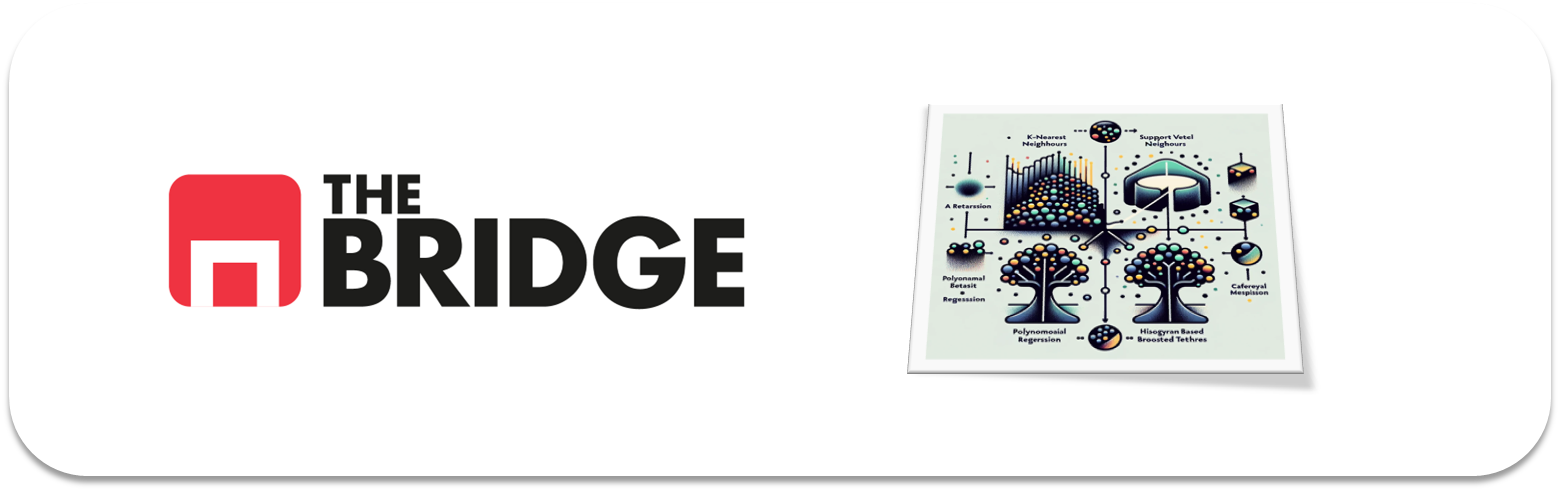

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import bootcampviztools as bt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet



### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("./data/wines_dataset.csv", sep = "|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df_copia = df.copy()
# target 1
y1 = "quality"
# target 2
y2 = "alcohol"

In [5]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)
# Quality
X_train = train_set.drop([y1, y2], axis = 1)
y1_train = train_set[y1]
y2_train = train_set[y2]

X_test = test_set.drop([y1, y2], axis = 1)
y1_test = test_set[y1]
y2_test = test_set[y2]

Target 1: Quality

In [6]:
df["quality"].unique()
# igual ya se explicaba en el enunciado que son puntuaciones de 0 a 10

array([6, 7, 3, 5, 4, 8, 9], dtype=int64)

In [7]:
y1_train.value_counts()

quality
6    2274
5    1706
7     869
4     173
8     146
3      24
9       5
Name: count, dtype: int64

In [8]:
round(y1_train.value_counts(True),2)

quality
6    0.44
5    0.33
7    0.17
4    0.03
8    0.03
3    0.00
9    0.00
Name: proportion, dtype: float64

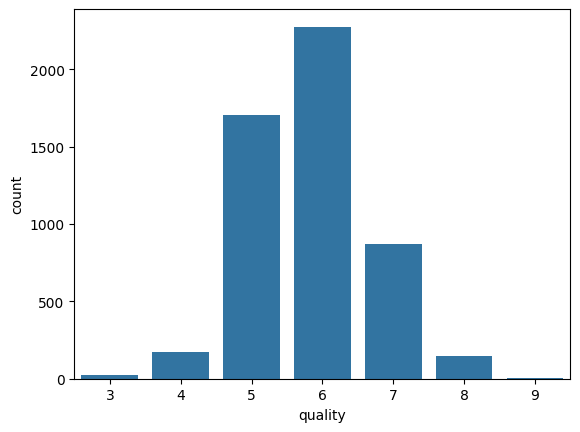

In [9]:
# distribución variable? balanceado o no? 

sns.countplot(x = y1_train, data = X_train);

Target 2: Alcohol

<Axes: xlabel='alcohol', ylabel='Count'>

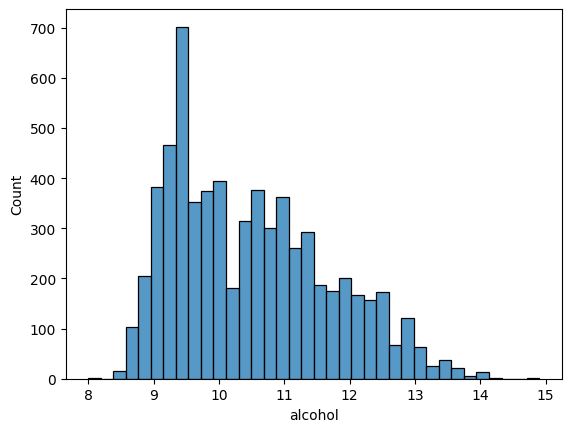

In [10]:
sns.histplot(df["alcohol"])

Mini EDA

In [11]:
#class a numero (0 y 1)
X_train["class"] = X_train["class"].map({"white": 0, "red": 1})
X_test["class"] = X_test["class"].map({"white": 0, "red": 1})

In [12]:
df_eda = pd.concat([X_train, y1_train, y2_train], axis=1)

Análisis bivariante categórica - target


In [13]:
var_cat = ["class"]

In [14]:
print(dir(bt))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'bubble_plot', 'grafico_dispersion_con_correlacion', 'np', 'pd', 'pinta_distribucion_categoricas', 'plot_categorical_numerical_relationship', 'plot_categorical_relationship_fin', 'plot_combined_graphs', 'plot_grouped_boxplots', 'plot_grouped_histograms', 'plt', 'sns']


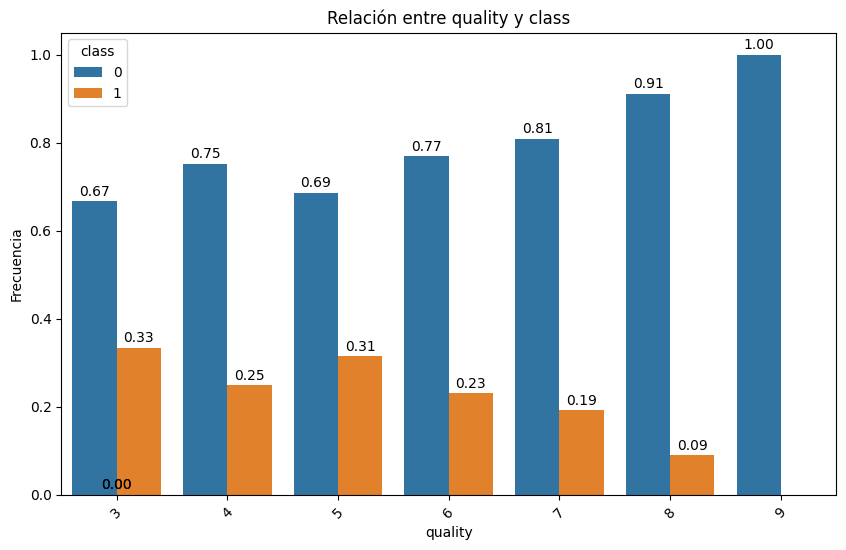

In [15]:
# target contra la categórica
bt.plot_categorical_relationship_fin(df_eda, "quality", "class", relative_freq=True, show_values=True)

Aunque la calidad 4 sea ligeramente excepcional, en las demás categorías sí que parece haber una relación: solo hay vinos blancos de calidad 9 ylos tintos entran en las categorías más bajas (porporción de tintos respecto a blancos inversamente proporcional a la calidad)

Análisis multivariante

In [16]:
df_eda.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,class,quality,alcohol
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.213527,0.339548,0.319244,5.466615,0.055733,30.563306,115.592457,0.994714,3.219144,0.531083,0.248220,5.817587,10.490439
std,1.293974,0.162938,0.145978,4.783581,0.032656,18.004967,56.805306,0.003012,0.160025,0.147928,0.432022,0.870688,1.194099
min,3.900000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,0.000000,3.000000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,76.000000,0.992360,3.110000,0.430000,0.000000,5.000000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,0.000000,6.000000,10.300000
75%,7.700000,0.400000,0.400000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,0.000000,6.000000,11.300000
max,15.500000,1.330000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.980000,1.000000,9.000000,14.050000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'alcohol'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

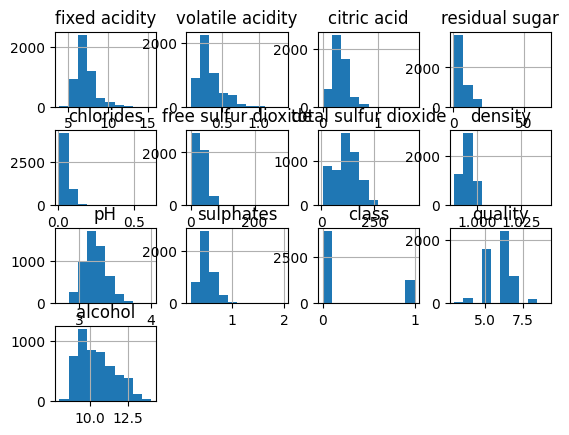

In [17]:
df_eda.hist()

In [18]:
# Ahora hay que hacer lo logarítimo y escalado, antes de las correlaciones y heatmap? 
# O hasta el modelo ya está bien?

In [19]:
#matriz de correlación
df_eda.corr(numeric_only= True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,class,quality,alcohol
fixed acidity,1.000000,0.214472,0.326562,-0.118995,0.305645,-0.287637,-0.339255,0.453447,-0.249151,0.300749,0.489122,-0.071698,-0.091964
volatile acidity,0.214472,1.000000,-0.386228,-0.194152,0.373995,-0.346059,-0.412218,0.271523,0.272458,0.225499,0.652963,-0.255368,-0.036041
citric acid,0.326562,-0.386228,1.000000,0.138600,0.030761,0.123664,0.191429,0.091340,-0.331794,0.044118,-0.189034,0.096020,-0.005690
residual sugar,-0.118995,-0.194152,0.138600,1.000000,-0.134384,0.402099,0.494696,0.555320,-0.264614,-0.184385,-0.353771,-0.039630,-0.357459
chlorides,0.305645,0.373995,0.030761,-0.134384,1.000000,-0.198295,-0.287617,0.368711,0.064569,0.363855,0.523182,-0.197389,-0.260508
free sulfur dioxide,-0.287637,-0.346059,0.123664,0.402099,-0.198295,1.000000,0.723322,0.030430,-0.149549,-0.188514,-0.468220,0.039678,-0.188460
total sulfur dioxide,-0.339255,-0.412218,0.191429,0.494696,-0.287617,0.723322,1.000000,0.034341,-0.241483,-0.281053,-0.701692,-0.050816,-0.272970
density,0.453447,0.271523,0.091340,0.555320,0.368711,0.030430,0.034341,1.000000,0.018402,0.260861,0.384596,-0.305107,-0.682345
pH,-0.249151,0.272458,-0.331794,-0.264614,0.064569,-0.149549,-0.241483,0.018402,1.000000,0.204925,0.338300,0.011918,0.116497
sulphates,0.300749,0.225499,0.044118,-0.184385,0.363855,-0.188514,-0.281053,0.260861,0.204925,1.000000,0.493462,0.052398,0.000412


In [20]:
corr_matrix = df_eda.corr(numeric_only= True)
corr_matrix["alcohol"].abs().sort_values(ascending = False)

alcohol                 1.000000
density                 0.682345
quality                 0.450403
residual sugar          0.357459
total sulfur dioxide    0.272970
chlorides               0.260508
free sulfur dioxide     0.188460
pH                      0.116497
fixed acidity           0.091964
volatile acidity        0.036041
class                   0.026966
citric acid             0.005690
sulphates               0.000412
Name: alcohol, dtype: float64

In [21]:
corr_matrix = df_eda.corr(numeric_only= True)
corr_matrix["quality"].abs().sort_values(ascending = False)

quality                 1.000000
alcohol                 0.450403
density                 0.305107
volatile acidity        0.255368
chlorides               0.197389
class                   0.111889
citric acid             0.096020
fixed acidity           0.071698
sulphates               0.052398
total sulfur dioxide    0.050816
free sulfur dioxide     0.039678
residual sugar          0.039630
pH                      0.011918
Name: quality, dtype: float64

In [22]:
columnas = corr_matrix["alcohol"][corr_matrix["alcohol"].abs() > 0.05].index.to_list()
if 'alcohol' in columnas:
    columnas.remove('alcohol')
columnas

['fixed acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'quality']

In [23]:
columnas2 = corr_matrix["quality"][corr_matrix["quality"].abs() > 0.05].index.to_list()
if 'quality' in columnas2:
    columnas2.remove('quality')
columnas2

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'class',
 'alcohol']

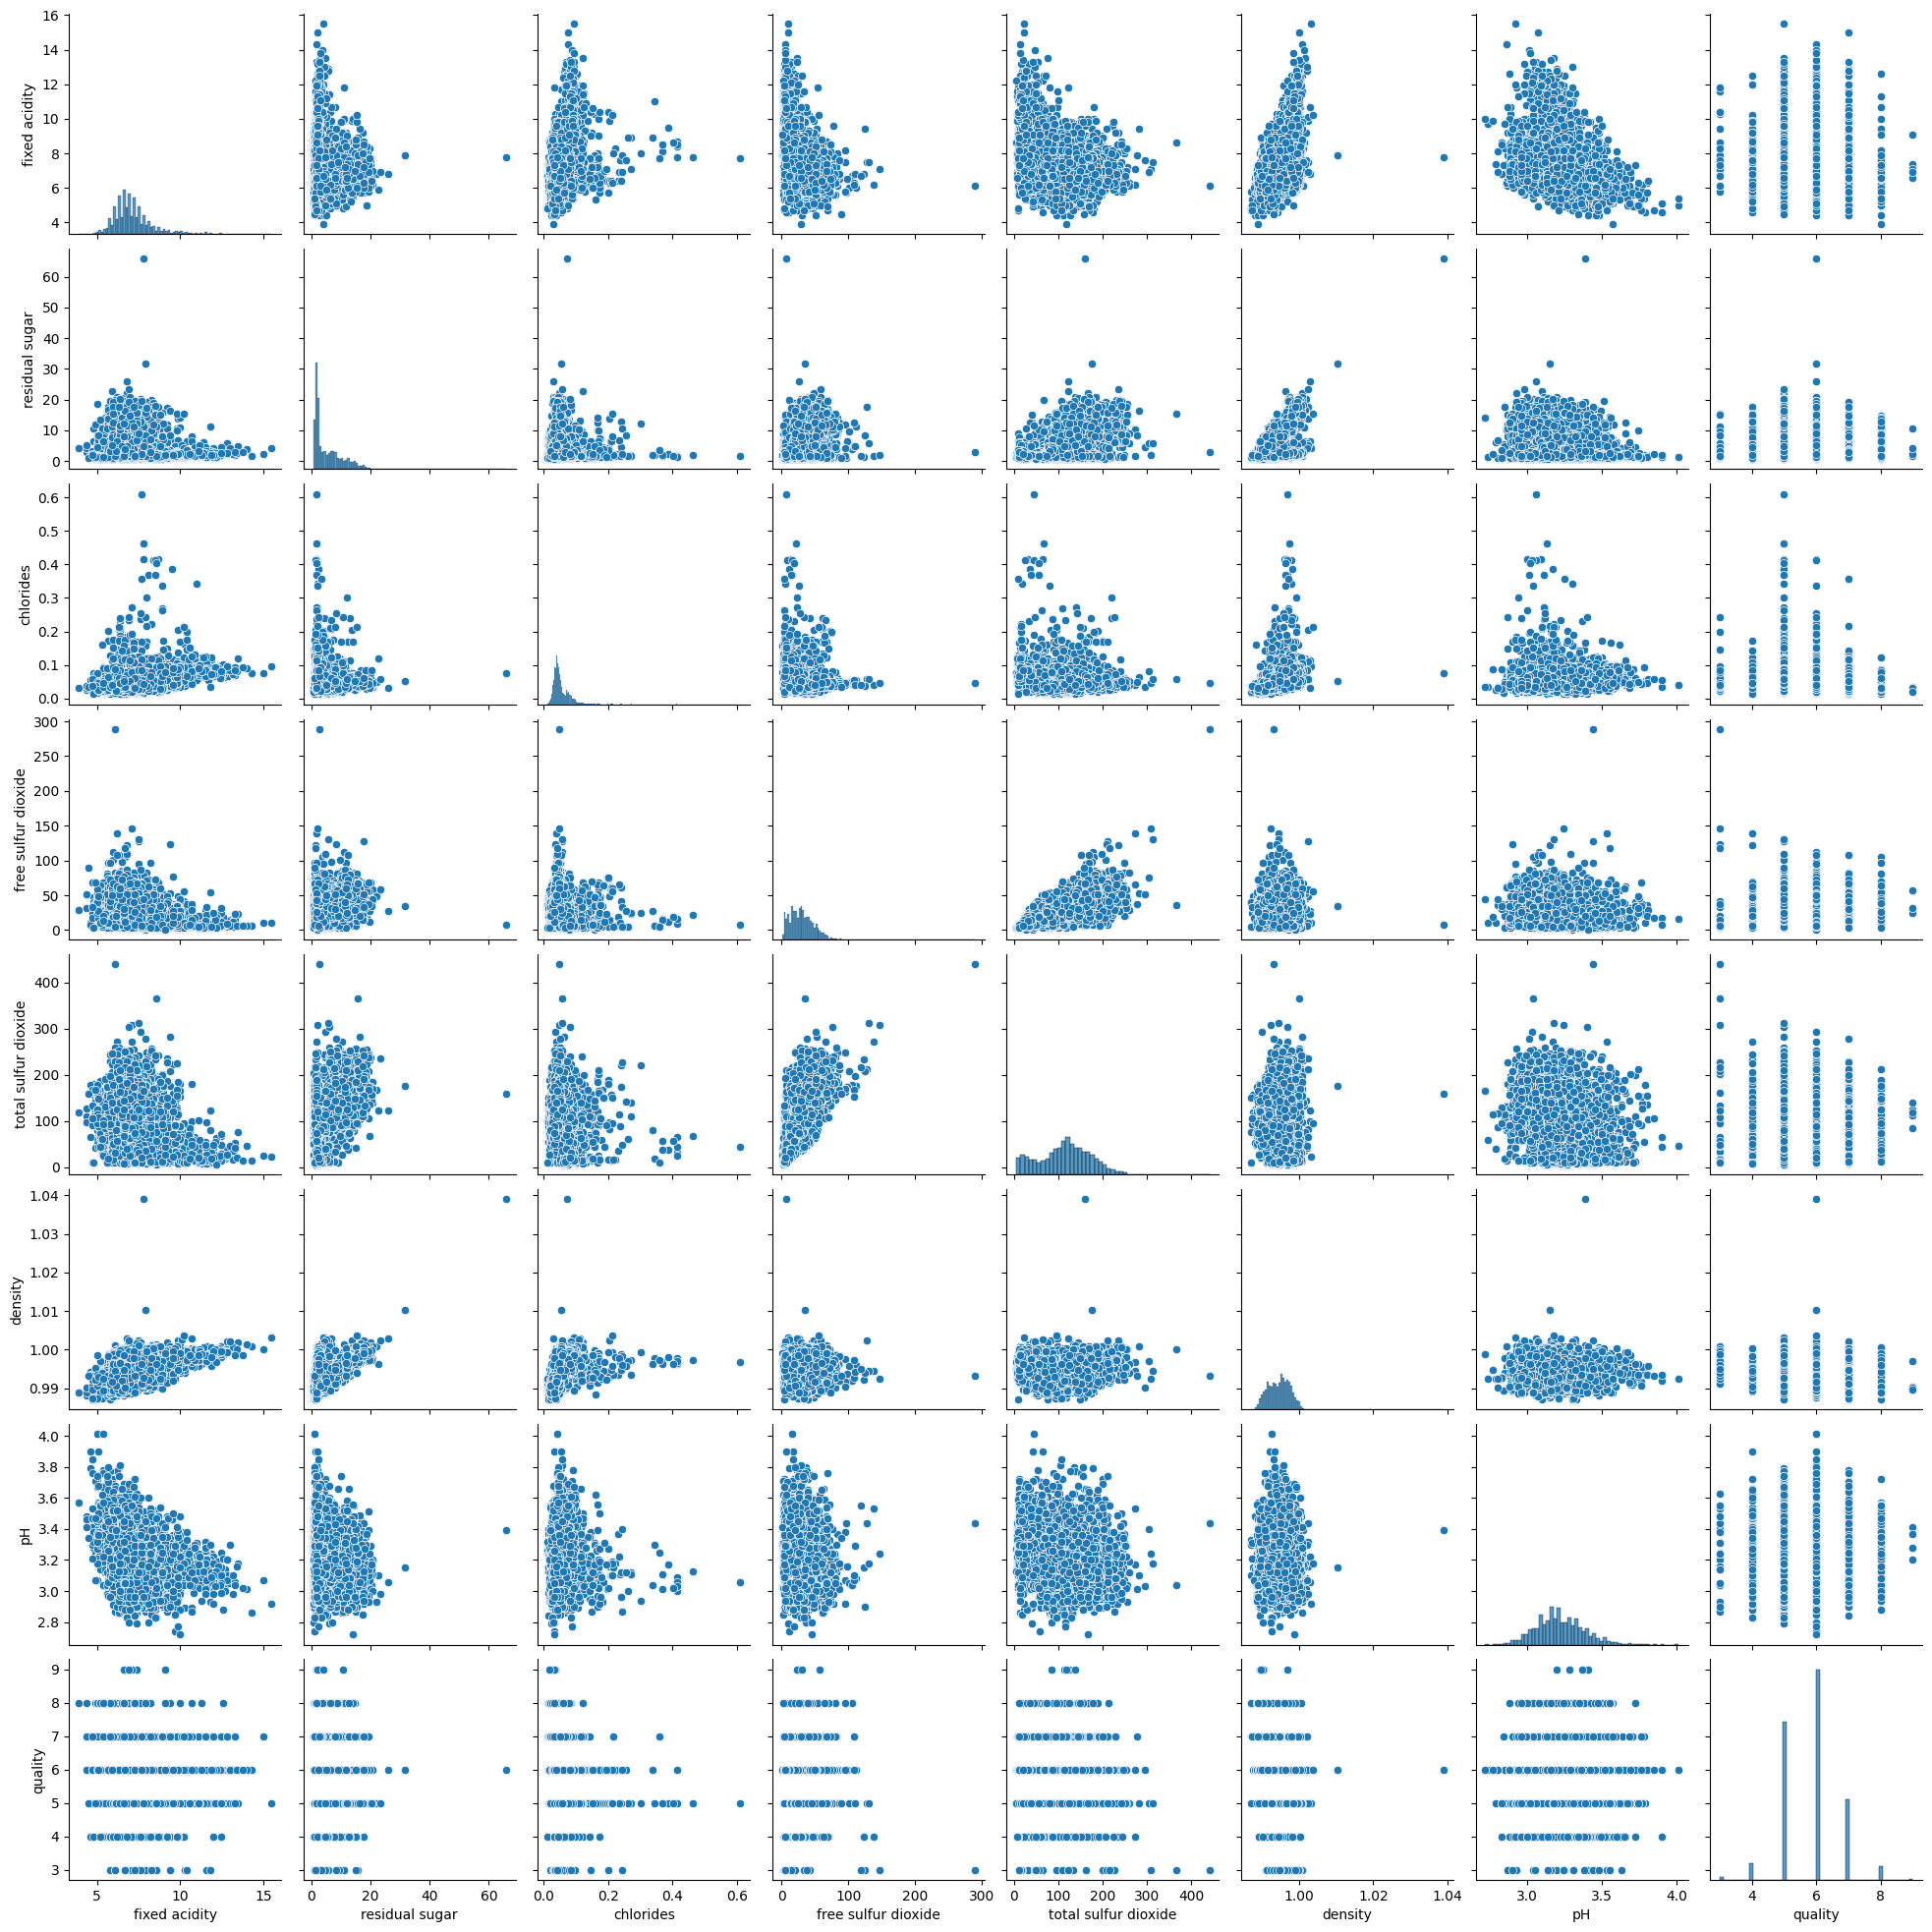

In [24]:
sns.pairplot(df_eda[columnas]);

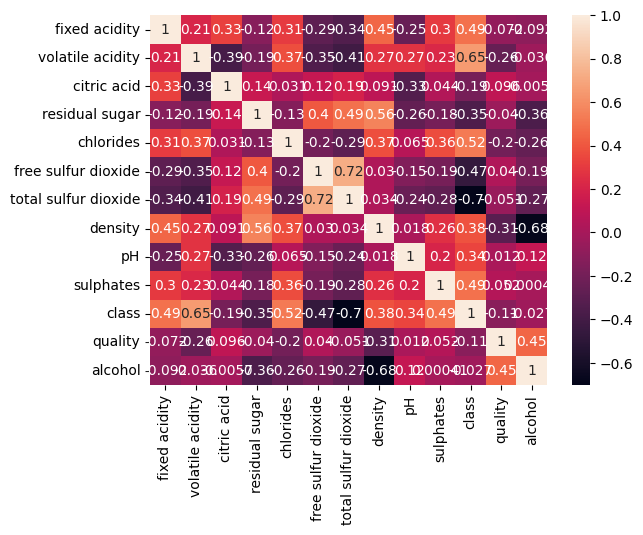

In [25]:
sns.heatmap(df_eda.corr(numeric_only = True),annot=True);
plt.show();

Assessment problema I:<br>
Se trata de un problema de clasificación donde hay que intentar predecir qué clase ("quality), del 0 al 10, le atribuirán a cada vino en la cata. Aunque sea numérica, se considerará esta variable como categórica, con el beneficio de no tener que hacerle ningún encoding, etc. para el modelo de ML. <br>
Excepto la variable class, binaria, todas las demás son numéricas, sean floats o integers<br>
Entre los posibles valores del target (0 a 10) las calidades 0, 1 y 2 no están siquiera representadas en la muestra. Las calidades 3 y 9 están muy infra representadas. La 4 y la 8 también estan infra representadas. Entre las otras 3 hay menos desbalanceo, pero también lo hay. Tal vez haya que hacer smote o alguna otra transformación de sampling?<br>
<br>
<br>

Assessment problema II: <br>
Es un problema de regresión logística en el que todas las variables son numéricas. <br>
Seguramente habrá que transformarlas porque tienen escalas muy dispares.<br>
A la variable target, vista su distribición escorada a la izquierda, tal vez habría que hacerle un tratado logarítmico para que tenga una distribición más normal o gaussiana. ¿Se le hace esto al target??<br>

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [26]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'class'],
      dtype='object')

In [27]:
X_train
X_train1 = pd.concat([X_train, y2_train], axis=1)
X_test
X_test1 = pd.concat([X_test, y2_test], axis=1)

features = X_train.columns
features2 = X_train1.columns

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)

X_train1_scaled = pd.DataFrame(scaler.fit_transform(X_train1), columns=features2)
X_test1_scaled = pd.DataFrame(scaler.transform(X_test1), columns=features2)

Además, tendré que hacerle un reindexado a las clases, que al comenzar en 3 luego me dará errores en el modelado

In [28]:
model_names = ["Logistic Regression","KNeighborsClassifier","Random Forest","LightGBM","CatBoost"]

lr_clf = LogisticRegression(max_iter = 10000)
knn_clf = KNeighborsClassifier(2)
rf_clf = RandomForestClassifier(random_state= 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, iterations=1000, verbose = False)

model_set = [lr_clf, knn_clf, rf_clf, lgb_clf, cat_clf]

In [29]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):

    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train1, y1_train, cv = 3, scoring = "recall_macro")
# Como el dataset está balanceado, accuracy es una buena medida
    else:
# solo para la regresión logística usamos el X_train escalado
        metricas_cv[nombre] = cross_val_score(modelo, X_train1_scaled, y1_train, cv = 3, scoring = "recall_macro")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression(max_iter=10000)
KNeighborsClassifier(n_neighbors=2)
RandomForestClassifier(random_state=42)
LGBMClassifier(random_state=42, verbose=-100)


In [30]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, recall_macro: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Logistic Regression>, recall_macro: 0.23094886167031384
Model <KNeighborsClassifier>, recall_macro: 0.23433861191152353
Model <Random Forest>, recall_macro: 0.32288807403559355
Model <LightGBM>, recall_macro: 0.3282998010500766
Model <CatBoost>, recall_macro: 0.3310464996823778
El ganador es CatBoost


In [31]:
# Hacer el sampling... pero no
#Es tan desbalanceado el dataset que debería inventarme millones de items de las clases más infrarrepresentadas, o eliminar la mayoría de los datos de los
#  que ya dispongo, por no decir que debería inventar para el caso elementos pertenecientes a las clases que no tienen directamente ningún representante

In [32]:
# remplazar por modelo ganador si no es catboost
cat_clf.fit(X_train1, y1_train)
y1_pred_train = cat_clf.predict(X_train1)

In [33]:
print(classification_report(y1_train, y1_pred_train))
# demasiado bueno para ser cierto, ya fallará en test...

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        24
           4       1.00      0.90      0.95       173
           5       0.93      0.93      0.93      1706
           6       0.92      0.95      0.93      2274
           7       0.96      0.90      0.93       869
           8       1.00      0.91      0.95       146
           9       1.00      1.00      1.00         5

    accuracy                           0.93      5197
   macro avg       0.97      0.94      0.96      5197
weighted avg       0.93      0.93      0.93      5197



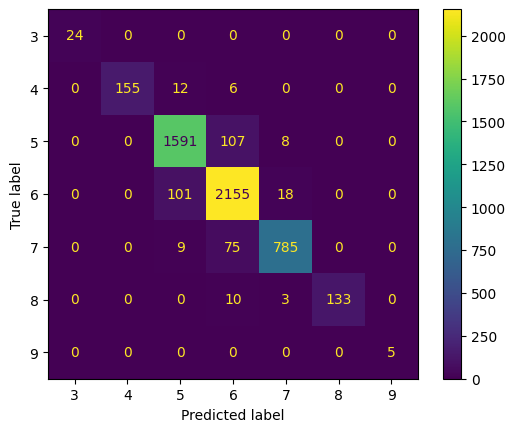

In [34]:
ConfusionMatrixDisplay.from_predictions(y1_train, y1_pred_train)

In [35]:
# Ahora para test
cat_clf.fit(X_train1, y1_train)
y1_pred_test = cat_clf.predict(X_test1)

In [36]:
print(classification_report(y1_test, y1_pred_test))
# Y tanto que falla en tets, cae a la mitad el macro_avg

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.47      0.16      0.24        43
           5       0.70      0.69      0.69       432
           6       0.64      0.72      0.68       562
           7       0.60      0.56      0.58       210
           8       0.81      0.47      0.59        47

    accuracy                           0.66      1300
   macro avg       0.54      0.43      0.47      1300
weighted avg       0.65      0.66      0.65      1300



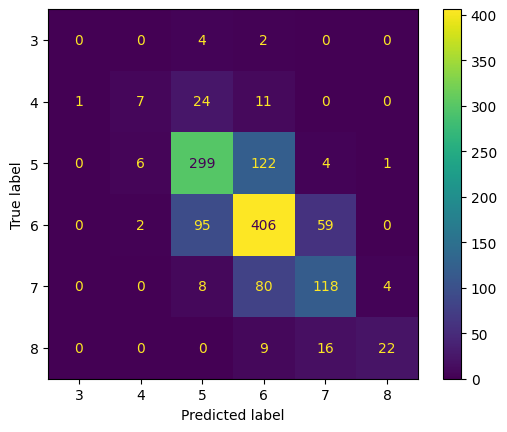

In [37]:
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred_test)
plt.show()

In [38]:
# La verdad es que baja bastante en test el valor del recall macro avg, de 0,94 a 0,43, es decir, prácticamente un 50%.
# Resultado batsante malo

In [39]:
catb_clf = CatBoostClassifier()

params_grid = {
    'iterations': [150, 200, 100], 
    'learning_rate': [0.2, 0.4, 0.6, 0.9],
    'depth' : [2,4,6,8],
    'auto_class_weights': ['Balanced'],
    'verbose' : [False]
}

catb_grid = GridSearchCV(catb_clf,
                       param_grid= params_grid,
                       cv = 3,
                       scoring = "recall_macro",
                       n_jobs = -1)

catb_grid.fit(X_train1, y1_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000237213539D0>,
             n_jobs=-1,
             param_grid={'auto_class_weights': ['Balanced'],
                         'depth': [2, 4, 6, 8], 'iterations': [150, 200, 100],
                         'learning_rate': [0.2, 0.4, 0.6, 0.9],
                         'verbose': [False]},
             scoring='recall_macro')

In [40]:
catb_grid.best_params_

{'auto_class_weights': 'Balanced',
 'depth': 6,
 'iterations': 150,
 'learning_rate': 0.2,
 'verbose': False}

In [41]:
catb_grid.best_score_

0.37262034869861743

In [42]:
catb_grid.best_estimator_.score(X_test1, y1_test)
# No sé muy bien qué representa esto...

0.5576923076923077

In [43]:
# A ver los resultados del modelo optimizado contra train
y1_train_pred = catb_grid.best_estimator_.predict(X_train1)
train_classification_report = classification_report(y1_train, y1_train_pred)
print(train_classification_report)

# En train ha caído... mmm....

              precision    recall  f1-score   support

           3       0.63      1.00      0.77        24
           4       0.43      0.99      0.60       173
           5       0.73      0.73      0.73      1706
           6       0.79      0.54      0.64      2274
           7       0.60      0.82      0.69       869
           8       0.52      0.99      0.68       146
           9       0.83      1.00      0.91         5

    accuracy                           0.68      5197
   macro avg       0.65      0.87      0.72      5197
weighted avg       0.71      0.68      0.68      5197



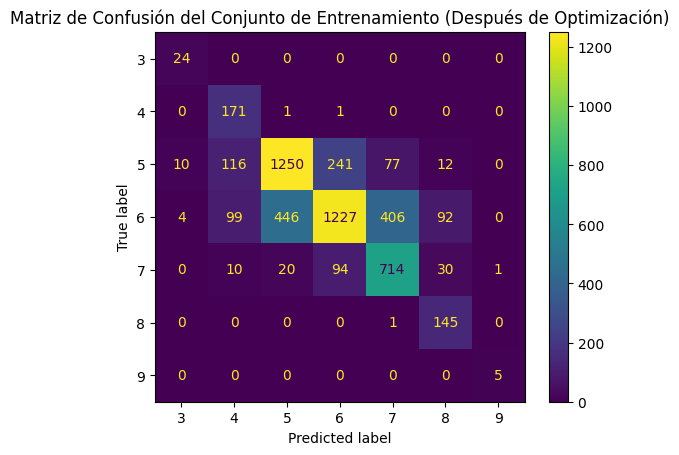

In [44]:
ConfusionMatrixDisplay.from_predictions(y1_train, y1_train_pred)
plt.title('Matriz de Confusión del Conjunto de Entrenamiento (Después de Optimización)')
plt.show()

In [45]:
#Y ahora contra test
y1_test_pred = catb_grid.best_estimator_.predict(X_test1)
test_classification_report = classification_report(y1_test, y1_test_pred)
print(test_classification_report)

# También en test está peor que antes :( 
# Cómo puede ser??

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.23      0.49      0.31        43
           5       0.67      0.66      0.66       432
           6       0.67      0.45      0.54       562
           7       0.44      0.69      0.54       210
           8       0.32      0.53      0.40        47
           9       0.00      0.00      0.00         0

    accuracy                           0.56      1300
   macro avg       0.33      0.40      0.35      1300
weighted avg       0.60      0.56      0.56      1300



c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

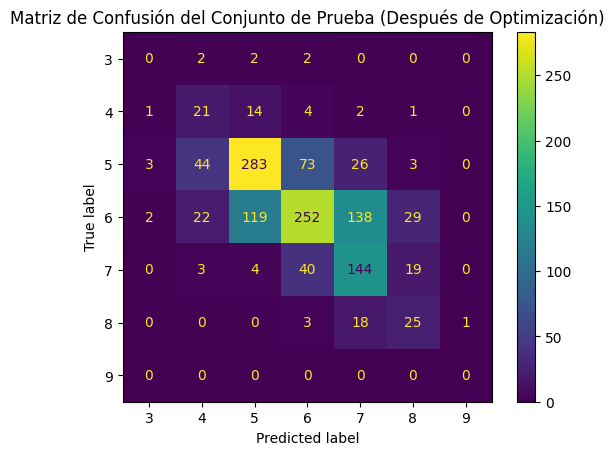

In [46]:
ConfusionMatrixDisplay.from_predictions(y1_test, y1_test_pred)
plt.title('Matriz de Confusión del Conjunto de Prueba (Después de Optimización)')
plt.show()

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [47]:
model_names = ["Regresion Lineal","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_clf = LinearRegression()
tree_clf = DecisionTreeRegressor(random_state= 42)
rf_clf = RandomForestRegressor(random_state= 42)
xgb_clf = XGBRegressor(random_state = 42)
lgb_clf = LGBMRegressor(random_state= 42, verbose = -100)
cat_clf = CatBoostRegressor(random_state= 42, verbose = False)

model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]

In [48]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre == "Regresion Lineal":
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y2_train, cv = 3, scoring = "neg_mean_squared_error")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y2_train, cv = 3, scoring = "neg_mean_squared_error")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LinearRegression()
DecisionTreeRegressor(random_state=42)
RandomForestRegressor(random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
LGBMRegressor(random_state=42, verbose=-100)


In [49]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(valores))}")
print(f"El ganador es {ganador}")

Model <Regresion Lineal>, RMSE_CV: 0.5210565866020286
Model <DecisionTree>, RMSE_CV: 0.5944732339093804
Model <Random Forest>, RMSE_CV: 0.419197761187771
Model <XGBoost>, RMSE_CV: 0.3941551558884838
Model <LightGBM>, RMSE_CV: 0.39212107522327194
Model <CatBoost>, RMSE_CV: 0.3689358743641744
El ganador es CatBoost


In [50]:
catb_rg = CatBoostRegressor(verbose = False)

params_grid = {
    'iterations': [150, 200, 100], 
    'learning_rate': [0.2, 0.4, 0.6, 0.9],
    'verbose' : [False]
}

catb_grid = GridSearchCV(catb_rg,
                       param_grid= params_grid,
                       cv = 3,
                       scoring = "recall_macro",
                       n_jobs = -1)

catb_grid.fit(X_train, y2_train)

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000023723A63880>,
             n_jobs=-1,
             param_grid={'iterations': [150, 200, 100],
                         'learning_rate': [0.2, 0.4, 0.6, 0.9],
                         'verbose': [False]},
             scoring='recall_macro')

In [51]:
np.sqrt(catb_grid.best_score_)

nan

In [52]:
catb_grid.best_params_

{'iterations': 150, 'learning_rate': 0.2, 'verbose': False}

In [53]:
y2_pred = catb_grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y2_test,y2_pred))
print("MAPE:", mean_absolute_percentage_error(y2_test,y2_pred))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))
# Ha subido de 0.36 a 0.38

MAE: 0.2809546463690217
MAPE: 0.02671142367009929
RMSE: 0.3813308325942539


In [54]:
metricas_optimizadas = {}

In [55]:
param_grid = {
    "alpha": [0.1, 1, 10, 100],
    "l1_ratio": [0.2,0.4,0.6,1]

} 
model = CatBoostRegressor()
lr_grid = RandomizedSearchCV( model,
                             cv = 3, 
                             n_iter = 20,
                             param_distributions= param_grid,
                             scoring= "neg_mean_squared_error"
)

catb_grid.fit(X_train_scaled,y2_train)
print("LR best_score:", np.sqrt(-catb_grid.best_score_))
metricas_optimizadas["Linear Regresion"] = np.sqrt(-catb_grid.best_score_)

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


LR best_score: nan


Un fiasco, la mejor versión del mejor modelo me da un miserable NaN :( Algo no está nada bien...

In [56]:
# me doy por vencida... Lo volveré a intentar más adelante